# Analysis for salmon trap data in the Dungenesss River from 2006
### Description of data:
Data is stored in MS Excel files with one sheet per year. For 2006, the counts for wild and hatchery fish are separate.



In [21]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
import io

In [22]:
# #read file in Windows
try:
    df_2006 = pd.read_excel(
   io="C:/Users/maria/OneDrive/Documents/data/pied_piper/Dungeness smolt trap 2005 - 2014.xlsx",
   sheet_name ='2006',
    header = [1,2]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df_2006.head()
columns = list(df_2006)
print(columns)

df_2006.columns  = ['_'.join(col) for col in df_2006.columns.values]
print(df_2006.columns)
df_2006 = df_2006.rename(columns={"Dates and fishing times_Down": "Down",
                        "Dates and fishing times_Up": "Up",
                        "Dates and fishing times_TimeIn": "In"})
df_2006 = df_2006.iloc[:-3]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_2006)

[('Dates and fishing times', 'Down'), ('Dates and fishing times', 'Up'), ('Dates and fishing times', 'TimeIn'), ('Chinook0', 'Total'), ('Chinook0', 'HatCWT'), ('Chinook0', 'Unmk Wld'), ('Chinook1', 'Total'), ('Chinook1', 'HatCWT'), ('Chinook1', 'Unmk '), ('Coho1', 'Total'), ('Coho1', 'Wild UC'), ('Coho1', 'Wldunmk'), ('Coho1', 'Hat-AD'), ('Coho0', 'Total'), ('Chum', 'Total'), ('Pink', 'Total'), ('Steelhead1', 'Total'), ('Steelhead1', 'WldUC'), ('Steelhead1', 'Wldunmk'), ('Steelhead1', 'Hat-AD'), ('Steely', 'Adult'), ('Cutthroat', 'Smolts'), ('Dolly varden', 'Smolt'), ('Dolly varden', 'Adult'), ('Trout Parr', 'Total'), ('Trout Parr', 'Steely'), ('Trout Parr', 'Cutts')]
Index(['Dates and fishing times_Down', 'Dates and fishing times_Up',
       'Dates and fishing times_TimeIn', 'Chinook0_Total', 'Chinook0_HatCWT',
       'Chinook0_Unmk Wld', 'Chinook1_Total', 'Chinook1_HatCWT',
       'Chinook1_Unmk ', 'Coho1_Total', 'Coho1_Wild UC', 'Coho1_Wldunmk',
       'Coho1_Hat-AD', 'Coho0_Total',

,Down,Up,In,Chinook0_Total,Chinook0_HatCWT,Chinook0_Unmk Wld,Chinook1_Total,Chinook1_HatCWT,Chinook1_Unmk,Coho1_Total,Coho1_Wild UC,Coho1_Wldunmk,Coho1_Hat-AD,Coho0_Total,Chum_Total,Pink_Total,Steelhead1_Total,Steelhead1_WldUC,Steelhead1_Wldunmk,Steelhead1_Hat-AD,Steely_Adult,Cutthroat_Smolts,Dolly varden_Smolt,Dolly varden_Adult,Trout Parr_Total,Trout Parr_Steely,Trout Parr_Cutts
0,2006-02-02 12:00:00,2006-02-02 16:08:00,4.133333,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,13.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,2006-02-02 16:08:00,2006-02-03 08:45:00,16.616667,0.0,NaN,0.0,0.0,NaN,0.0,8.0,NaN,8.0,NaN,0.0,18.0,2.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,9.0,9.0,NaN
2,2006-02-03 08:45:00,2006-02-03 16:41:00,7.933333,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,7.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2.0,2.0,NaN
3,2006-02-03 16:41:00,2006-02-04 04:40:00,11.983333,0.0,NaN,0.0,0.0,NaN,0.0,15.0,NaN,15.0,NaN,0.0,11.0,4.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2.0,2.0,NaN
4,2006-02-04 05:35:00,2006-02-04 17:21:00,11.766667,0.0,NaN,0.0,0.0,NaN,0.0,2.0,NaN,2.0,NaN,0.0,17.0,21.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2.0,2.0,NaN
5,2006-02-04 17:21:00,2006-02-04 23:00:00,5.650000,0.0,NaN,0.0,0.0,NaN,0.0,7.0,NaN,7.0,NaN,0.0,6.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,1.0,NaN
6,2006-02-05 00:22:00,2006-02-05 08:31:00,8.150000,0.0,NaN,0.0,0.0,NaN,0.0,7.0,NaN,7.0,NaN,0.0,17.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2.0,2.0,NaN
7,2006-02-05 08:31:00,2006-02-05 17:10:00,8.650000,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,20.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN
8,2006-02-05 17:10:00,2006-02-06 08:20:00,15.166667,0.0,NaN,0.0,0.0,NaN,0.0,31.0,NaN,31.0,NaN,0.0,4.0,1.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,8.0,NaN,NaN
9,2006-02-06 08:20:00,2006-02-06 17:50:00,9.500000,0.0,NaN,0.0,0.0,NaN,0.0,4.0,NaN,4.0,NaN,0.0,6.0,1.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


In [23]:
#making new columns
df_2006["Down"] = pd.to_datetime(df_2006["Down"])
df_2006["Up"] = pd.to_datetime(df_2006["Up"])
df_2006['Date'] = df_2006['Down'].dt.date
df_2006['midpoint'] = df_2006['Down'] + (df_2006['Up'] - df_2006['Down'])/2

#getting temperature data
#reading html data
year = '2006'
url = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year + "_WTM_FM.TXT"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()
text = text[521:]

df = pd.read_csv(io.StringIO(text), sep='\s+', header = None, names = ["date", "time", "temp", "quality"])
df = df.iloc[:-2] #removing last two rows that do not contain data
df['midpoint'] =  pd.to_datetime(df['date'] + ' ' + df['time'])

df_2006_temp = pd.merge_asof(df_2006.dropna(subset = ['midpoint']),df, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

# flow data 
url_flow = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year+ "_DSG_FM.TXT"
html_flow = urlopen(url_flow).read()
soup_flow = BeautifulSoup(html_flow, features="html.parser")

# kill all script and style elements
for script in soup_flow(["script", "style"]):
    script.extract()    # rip it out

# get text
text_flow = soup_flow.get_text()
text_flow = text_flow[509:-129]

df_flow = pd.read_csv(io.StringIO(text_flow), sep='\s+', header = None, names = ["date", "time", "flow", "quality"])

df_flow['midpoint'] =  pd.to_datetime(df_flow['date'] + ' ' + df_flow['time'])

df_2006_temp_flow = pd.merge_asof(
    df_2006_temp.dropna(subset = ['midpoint']),df_flow, on="midpoint",tolerance=pd.Timedelta(minutes = 15))


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [41]:
df_2006_temp_flow['temp'] = pd.to_numeric(df_2006_temp_flow['temp'], errors='coerce')


#aggregating the data
groupedby_dates_2006 = df_2006_temp_flow.groupby(by=["Date"]).agg({'In':'sum',
                                       'Chinook0_Total':'sum',
                                       'Chinook0_HatCWT':'sum',
                                       'Chinook0_Unmk Wld':'sum',                            
                                       'Chinook1_Total':'sum',
                                       'Chinook1_HatCWT':'sum',
                                       'Chinook1_Unmk ':'sum',  
                                       'Coho1_Total':'sum',
                                       'Coho1_Wild UC':'sum',
                                       'Coho1_Wldunmk':'sum',
                                       'Coho1_Hat-AD':'sum', 
                                       'Coho0_Total':'sum',
                                       'Chum_Total':'sum',
                                       'Pink_Total':'sum',  
                                       'Steelhead1_Total':'sum',
                                       'Steelhead1_WldUC':'sum',
                                       'Steelhead1_Wldunmk':'sum',
                                       'Steelhead1_Hat-AD':'sum',
                                       'Steely_Adult':'sum',
                                       'Cutthroat_Smolts':'sum',
                                       'Dolly varden_Smolt':'sum',
                                       'Dolly varden_Adult':'sum',  
                                       'Trout Parr_Total':'sum',
                                       'Trout Parr_Steely':'sum',
                                       'Trout Parr_Cutts':'sum',                            
                                       'temp':'mean',
                                       'flow':'mean'})

groupedby_dates_2006.fillna(0)

,In,Chinook0_Total,Chinook0_HatCWT,Chinook0_Unmk Wld,Chinook1_Total,Chinook1_HatCWT,Chinook1_Unmk,Coho1_Total,Coho1_Wild UC,Coho1_Wldunmk,...,Steelhead1_Hat-AD,Steely_Adult,Cutthroat_Smolts,Dolly varden_Smolt,Dolly varden_Adult,Trout Parr_Total,Trout Parr_Steely,Trout Parr_Cutts,temp,flow
Date,,,,,,,,,,,,,,,,,,,,,
2006-02-02,20.750000,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,5.100000,694.000000
2006-02-03,19.916667,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,5.000000,624.000000
2006-02-04,17.416667,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,5.100000,1200.000000
2006-02-05,31.966667,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,38.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2.0,0.0,4.333333,929.666667
2006-02-06,24.166667,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,22.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,4.350000,719.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-08-10,23.166667,21.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.050000,166.500000
2006-08-11,15.000000,16.0,0.0,16.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.700000,149.000000
2006-08-14,14.416667,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,13.200000,129.000000


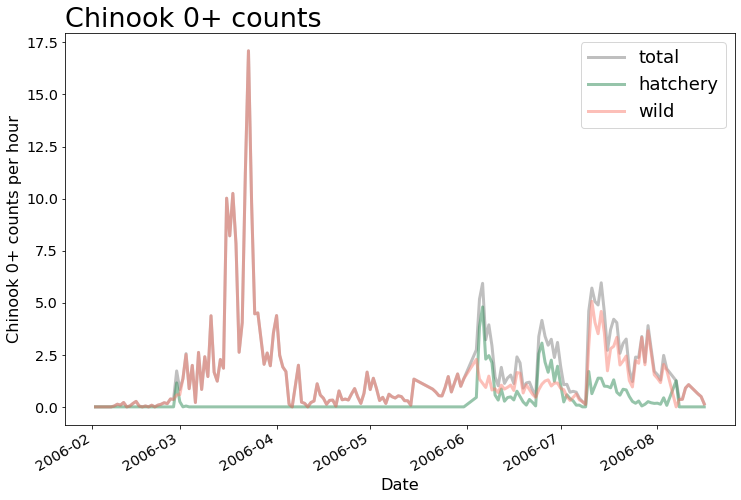

In [42]:

#Chinook0

groupedby_dates_2006['chinook0_perhour'] = groupedby_dates_2006['Chinook0_Total']/groupedby_dates_2006['In']
groupedby_dates_2006['chinook0_hatchery_perhour'] = groupedby_dates_2006['Chinook0_HatCWT']/groupedby_dates_2006['In']
groupedby_dates_2006['chinook0_wild_perhour'] = groupedby_dates_2006['Chinook0_Unmk Wld']/groupedby_dates_2006['In']


fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
ax1.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['chinook0_perhour'], color = 'gray',
    label = 'total', alpha = 0.5, linewidth = lw)
ax1.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['chinook0_hatchery_perhour'], color = 'seagreen',
    label = 'hatchery', alpha = 0.5, linewidth = lw)
ax1.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['chinook0_wild_perhour'], color = 'salmon',
    label = 'wild', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Chinook 0+ counts per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Chinook 0+ counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

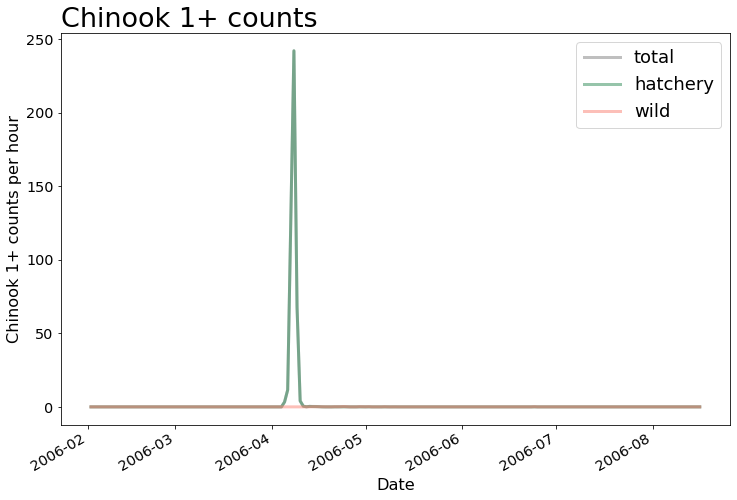

In [45]:

#Chinook1
groupedby_dates_2006.rename(columns = {'Chinook1_Unmk ':'Chinook1_Unmk'}, inplace = True)
groupedby_dates_2006['chinook1_perhour'] = groupedby_dates_2006['Chinook1_Total']/groupedby_dates_2006['In']
groupedby_dates_2006['chinook1_hatchery_perhour'] = groupedby_dates_2006['Chinook1_HatCWT']/groupedby_dates_2006['In']
groupedby_dates_2006['chinook1_wild_perhour'] = groupedby_dates_2006['Chinook1_Unmk']/groupedby_dates_2006['In']


fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
ax1.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['chinook1_perhour'], color = 'gray',
    label = 'total', alpha = 0.5, linewidth = lw)
ax1.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['chinook1_hatchery_perhour'], color = 'seagreen',
    label = 'hatchery', alpha = 0.5, linewidth = lw)
ax1.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['chinook1_wild_perhour'], color = 'salmon',
    label = 'wild', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Chinook 1+ counts per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Chinook 1+ counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

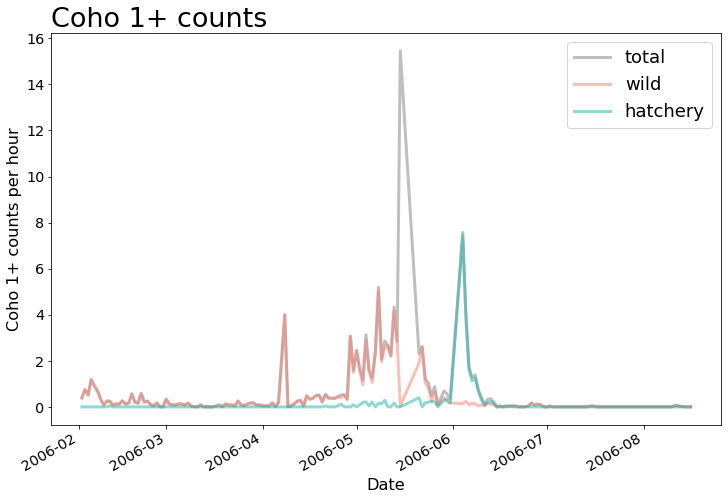

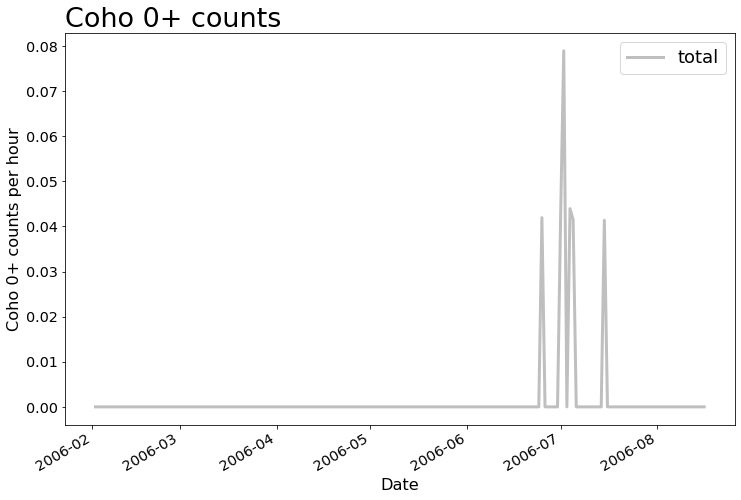

In [48]:
#Coho0
groupedby_dates_2006['coho0_perhour'] = groupedby_dates_2006['Coho0_Total']/groupedby_dates_2006['In']


#Coho1

groupedby_dates_2006['coho1_perhour'] = groupedby_dates_2006['Coho1_Total']/groupedby_dates_2006['In']

groupedby_dates_2006['Coho 1+ UC mark Wild per hour'] = (
    groupedby_dates_2006['Coho1_Wild UC']/groupedby_dates_2006['In'])

groupedby_dates_2006['Coho 1+ Wild unmarked per hour'] = (
    groupedby_dates_2006['Coho1_Wldunmk']/groupedby_dates_2006['In'])

groupedby_dates_2006['coho1_wild_perhour'] = (
    groupedby_dates_2006['Coho 1+ UC mark Wild per hour'] + groupedby_dates_2006['Coho 1+ Wild unmarked per hour'])

groupedby_dates_2006['Coho 1+ Hatchery ad-mark per hour'] = (
    groupedby_dates_2006['Coho1_Hat-AD']/groupedby_dates_2006['In'])

# groupedby_dates_2006['Coho 1+ hatchery CWT not ad-marked per hour'] = (
#     groupedby_dates_2006['Coho 1+ hatchery CWT not ad-marked']/groupedby_dates_2006['In'])

groupedby_dates_2006['coho1_hatchery_perhour'] = (
    groupedby_dates_2006['Coho 1+ Hatchery ad-mark per hour'])

lw = 3
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
ax1.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['coho1_perhour'], color = 'gray', 
    label = 'total', alpha = 0.5, linewidth = lw)

ax1.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['coho1_wild_perhour'], color = 'salmon', 
    label = 'wild', alpha = 0.5, linewidth = lw)


ax1.plot(groupedby_dates_2006.index, groupedby_dates_2006['coho1_hatchery_perhour'], color = 'lightseagreen', 
         label = 'hatchery', alpha = 0.5, linewidth = lw)

plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Coho 1+ counts per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Coho 1+ counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()


fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
ax1.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['coho0_perhour'], color = 'gray', 
    label = 'total', alpha = 0.5, linewidth = lw)

plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Coho 0+ counts per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Coho 0+ counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()


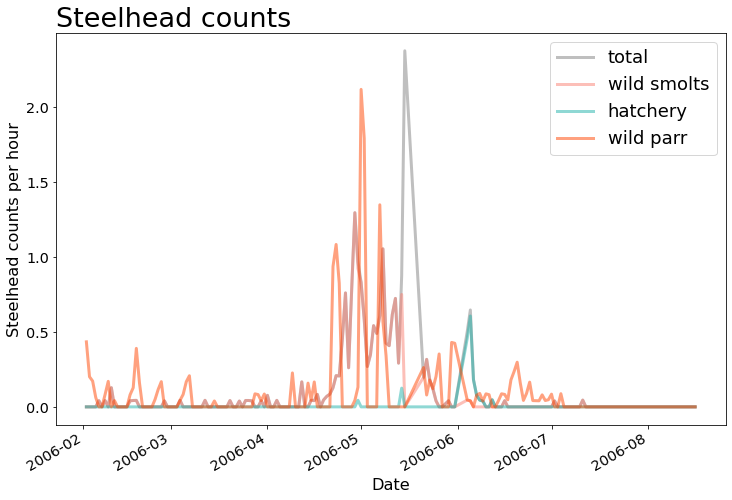

In [50]:
#Steelhead
groupedby_dates_2006['steelheadsmolt_perhour'] = (
    groupedby_dates_2006['Steelhead1_Total']/groupedby_dates_2006['In'])

groupedby_dates_2006['steelheadsmolt_wildUC_perhour'] = (
    groupedby_dates_2006['Steelhead1_WldUC']/groupedby_dates_2006['In'])

groupedby_dates_2006['steelheadsmolt_wild_unmarked_perhour'] = (
    groupedby_dates_2006['Steelhead1_Wldunmk']/groupedby_dates_2006['In'])

groupedby_dates_2006['steelheadsmolt_wild_perhour'] = (
    groupedby_dates_2006['steelheadsmolt_wildUC_perhour'] + groupedby_dates_2006['steelheadsmolt_wild_unmarked_perhour'])

groupedby_dates_2006['steelhead_hatchery_perhour'] = (
    groupedby_dates_2006['Steelhead1_Hat-AD']/groupedby_dates_2006['In'])

groupedby_dates_2006['steelheadparr_perhour'] = (
    groupedby_dates_2006['Trout Parr_Steely']/groupedby_dates_2006['In'])

fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
ax1.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['steelheadsmolt_perhour'], color = 'gray', 
    label = 'total', alpha = 0.5, linewidth = lw)

ax1.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['steelheadsmolt_wild_perhour'], color = 'salmon', 
    label = 'wild smolts', alpha = 0.5, linewidth = lw)


ax1.plot(groupedby_dates_2006.index, groupedby_dates_2006['steelhead_hatchery_perhour'], color = 'lightseagreen', 
         label = 'hatchery', alpha = 0.5, linewidth = lw)

ax1.plot(groupedby_dates_2006.index, groupedby_dates_2006['steelheadparr_perhour'], color = 'orangered', 
         label = 'wild parr', alpha = 0.5, linewidth = lw)

plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Steelhead counts per hour', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Steelhead counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

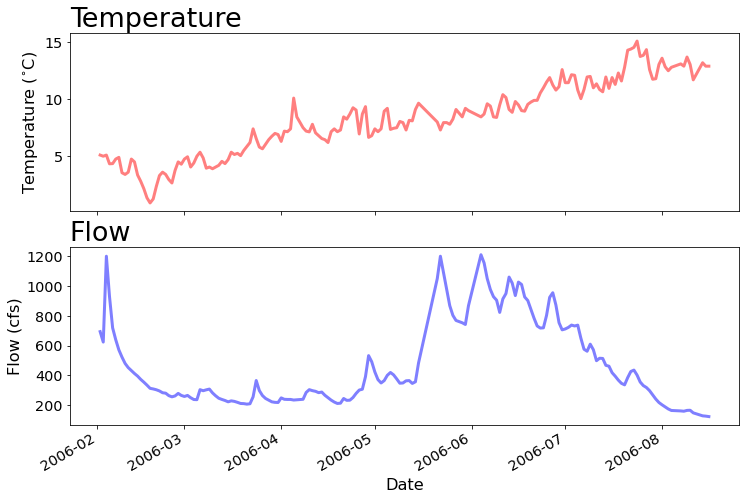

In [51]:
#plot temperature and flow
fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['temp'], color = 'red', 
    label = 'temperature', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Temperature '+ r'($^{\circ}$C)', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Temperature', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')


#flow
ax2 = fig.add_subplot(212)
ax2.plot(
    groupedby_dates_2006.index, groupedby_dates_2006['flow'], color = 'blue', 
    label = 'flow', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Flow (cfs)', size = 0.9*fs)
ax2.tick_params(labelsize=.8*fs)
ax2.set_title('Flow', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

In [52]:
#save datafram to csv in linux
# groupedby_dates_2005.to_csv('/home/maria/Documents/data/pied_piper/2005_dungeness.csv')  

#save datafram to csv in windows
groupedby_dates_2006.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2006_dungeness.csv")  


In [39]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_2006_temp_flow['Chinook1_Total'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
39       0.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
48       1.0
49       0.0
50       0.0
51       0.0
52       0.0
53       0.0
54       0.0
55       0.0
56       0.0
57       0.0
58       0.0
59       0.0
60       0.0
61       0.0
62       0.0
63       0.0
64       0.0
65       0.0
66       0.0
67       1.0
68       0.0
69       0.0
70       0.0
71       0.0
72       0.0
73       0.0
74       0.0
75       0.0
76       0.0